C:\Users\DIP_LAB\anaconda3\envs\RLearninng\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


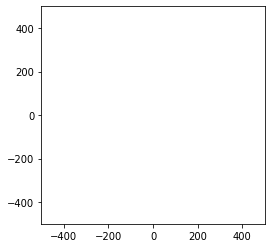

In [1]:
# A PSO side file for a draaging object(Particle)

import matplotlib.pyplot as plt 
import matplotlib.patches as patches #Pathes contains shapes(circle,box,rectangles etc)

fig = plt.figure(figsize=(4,4))
plt.xlim([-500,500])
plt.ylim([-500, 500])
ax= fig.add_subplot(111)

In [5]:
# Now creating a class for a drggable-particle

class Draggable_particle:
    lock = None
    #Setting attrivutes for the Particle
    def __init__(self,point):
        self.point = point
        self.press = None
        self.background = None
        self.ID = None 
    
    # Now Setting getters and Seters
    def setId(self, ID):
        self.ID = ID
    def GetId():
        return self.ID
    # Now we need to create event functions
    def on_press(self,event):
            # ON press we will lock the draggable Particle to itself gets the canvas and gets 
            # the axis itself and draw the canvas
            if event.inaxes != self.point.axes: 
                return
            if Draggable_particle.lock is not None: 
                return
            contains, attrd = self.point.contains(event)
            if not contains: 
                return
            self.press = (self.point.center), event.xdata, event.ydata
            Draggable_particle.lock = self
            canvas = self.point.figure.canvas
            axes = self.point.axes
            self.point.set_animated(True)
            canvas.draw()
            self.background = canvas.copy_from_bbox(self.point.axes.bbox)
            axes.draw_artist(self.point)
            canvas.blit(axes.bbox)
        
         # X and Y positions are derived from on_press()
        # We will use the diffrence between the press position and new poistion
        # to update the target position on the canvas
        # and then add or output this position to a CSV File
        
    def on_motion(self,event):
            if Draggable_particle.lock is not self:
                return
            if event.inaxes != self.point.axes:
                return
            self.point.center, xpress, ypress = self.press
            dx =event.xdata - xpressress
            dy = event.ydata - ypress
            self.point.center = (self.point.center[0]+dx, self.point.center[1]+dy)
            #Printing and writtig target positions to a CSV File
            print(str(self.point.center[0]) + ',' + str( self.point.center[1]), 
                  file = open('Target.csv', 'w'))
            canvas = self.point.figure.canvas
            axes = self.point.axes
            canvas.restore_region(self.background)
            axes.draw_artist(self.point)
            canvas.blit(axes.bbox)
        
        # on release we will set background and press to None
        # Also the point need not animation 
    def on_release(self, event):
            'on release we reset the press data'
            if Draggable_particle.lock is not self:
                return
            self.press = None
            Draggable_particle.lock = None
            self.point.set_animated(False)
            self.background= None
            self.point.figure.canvas.draw()
        
         
    # Now creating function for mouse events
    def connect(self):
        'Connect to all events we need'
        # When the mouse press event is triggered, self.on_press function is called
        self.cidpress = self.point.figure.canvas.mpl_connect("button_press_event",self.on_press)
        # When the mouse press is released, self.on_releas function is called
        self.cidrealease = self.point.figure.canvas.mpl_connect("button_release_event",self.on_release)
        # When the mouse is dragged or in during motion, self.on_motion function is called
        self.cidmotion = self.point.figure.canvas.mpl_connect("motion_notify_event",self.on_motion)
        
    def disconnect (self):
            'To disconnect all stored connection ids'
            self.point.figure.canvas.mpl_disconnect(self.cidpress)
            self.point.figure.canvas.mpl_disconnect(self.cidrealease)
            self.point.figure.canvas.mpl_disconnect(self.cidmotion)


No handles with labels found to put in legend.


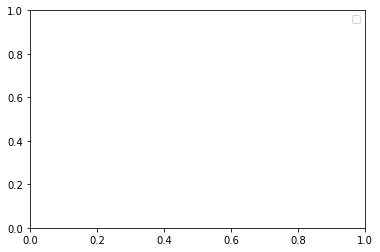

In [6]:
# We can have a list of circles but here we required only one circl to draw at position 10,10 and 
# radius 20

drs = []
circles = [patches.Circle( (10, -10),    20,  label='Click to drag the Target', fc = 'k',color = 'k', alpha=1)]

count = 0 

for circle in circles:
    ax.add_patch(circle)
    dr_object = Draggable_particle(circle)
    dr_object.setId(count)
    dr_object.connect()
    drs.append(dr_object)
    count += 1

plt.legend()
plt.show()